Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Image Selected: /content/drive/MyDrive/it24101838assigment/archive/Garbage_Dataset_Classification/images/cardboard/cardboard_01782.jpg


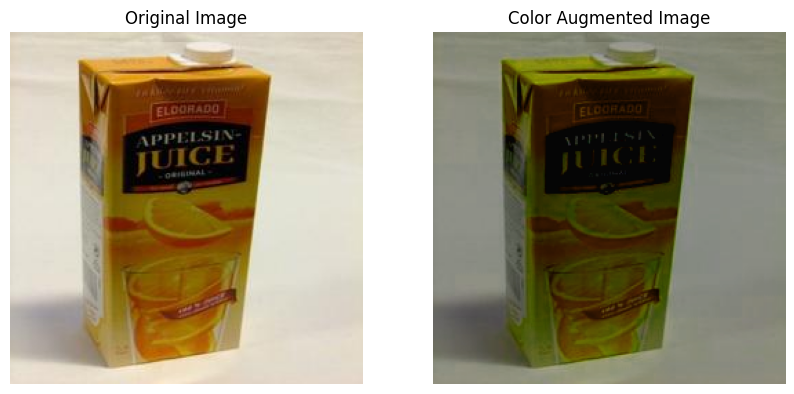

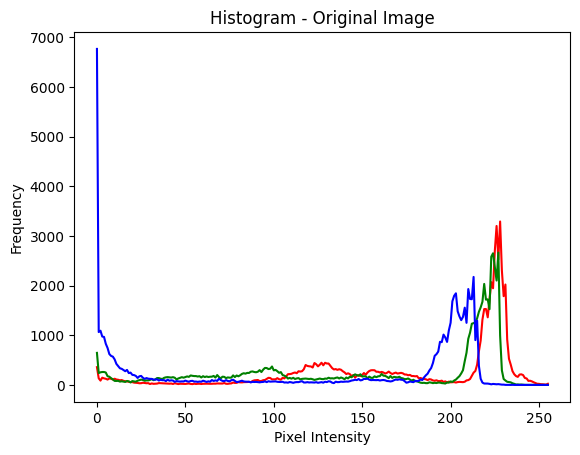

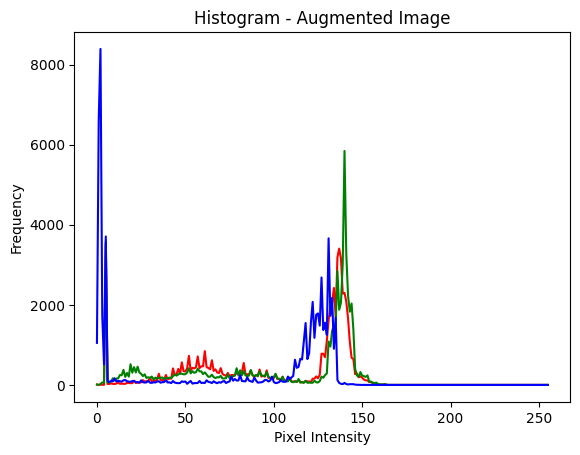

✅ Batch augmentation completed. Augmented dataset saved at: Garbage_Dataset_Classification/augmented_images


In [4]:
# 📌 Color Augmentation - Garbage Classification Dataset
# Author: Your Name (IT Number)
# Task: Color Augmentation for Preprocessing & EDA

import os
import cv2
import random
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/it24101838assigment/metadata.csv")

# ==============================
# 1. Load Dataset
# ==============================
data_path = "/content/drive/MyDrive/it24101838assigment/archive/Garbage_Dataset_Classification/images"  # update if needed

# Pick a random class (directory) and image
# Ensure we only pick directories as classes
class_dirs = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]
if not class_dirs:
    raise FileNotFoundError(f"No class directories found in {data_path}")

class_name = random.choice(class_dirs)
class_path = os.path.join(data_path, class_name)

img_file = random.choice(os.listdir(class_path))
img_path = os.path.join(class_path, img_file)

# Read image
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("Random Image Selected:", img_path)

# ==============================
# 2. Define Color Augmentation Pipeline
# ==============================
color_augment = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.7),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.5),
    A.ToGray(p=0.2)  # randomly convert to grayscale
])

# Apply augmentation
augmented = color_augment(image=image)
aug_image = augmented['image']

# ==============================
# 3. Show Original vs Augmented
# ==============================
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Color Augmented Image")
plt.imshow(aug_image)
plt.axis("off")

plt.show()

# ==============================
# 4. EDA Visualization
# ==============================
def plot_histogram(img, title):
    colors = ('r','g','b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist, color=col)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Histogram before augmentation
plot_histogram(image, "Histogram - Original Image")

# Histogram after augmentation
plot_histogram(aug_image, "Histogram - Augmented Image")

# ==============================
# 5. Batch Augmentation (Save multiple augmented images)
# ==============================
output_dir = "Garbage_Dataset_Classification/augmented_images"
os.makedirs(output_dir, exist_ok=True)

# Example: augment 5 random images per class
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    # Ensure class_path is a directory before processing
    if not os.path.isdir(class_path):
        continue

    # Create class folder inside augmented directory
    save_path = os.path.join(output_dir, class_name)
    os.makedirs(save_path, exist_ok=True)

    images = os.listdir(class_path)
    for img_name in random.sample(images, min(5, len(images))):  # pick up to 5 per class
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Generate 3 augmented versions
        for i in range(3):
            aug = color_augment(image=img)
            aug_img = cv2.cvtColor(aug['image'], cv2.COLOR_RGB2BGR)
            save_file = os.path.join(save_path, f"aug_{i}_{img_name}")
            cv2.imwrite(save_file, aug_img)

print("✅ Batch augmentation completed. Augmented dataset saved at:", output_dir)